Plot of $$Pr(y = 1 | x) = \text{sig} [\phi_0 + \phi_1 x]$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, phi_0, phi_1):
    return 1/(1+np.exp(-(phi_0 + phi_1*x)))


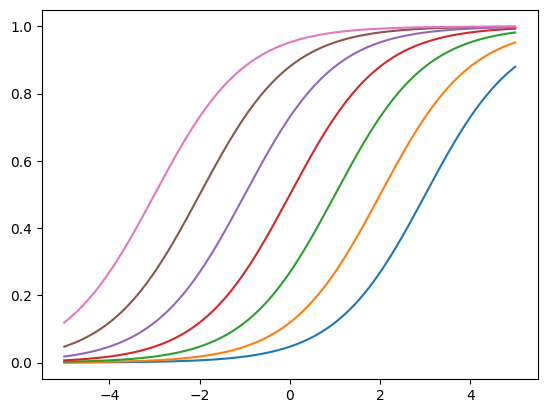

In [5]:

fig,ax = plt.subplots()

x = np.arange(-5,5,0.01)
phi_0s = [-3, -2, -1, 0, 1, 2, 3]
phi_1s = [1, 1, 1, 1, 1, 1, 1]

for phi_0, phi_1 in zip(phi_0s, phi_1s):
    y = f(x, phi_0, phi_1)
    ax.plot(x,y,label=f'$\phi_0={phi_0}, \phi_1={phi_1}$')

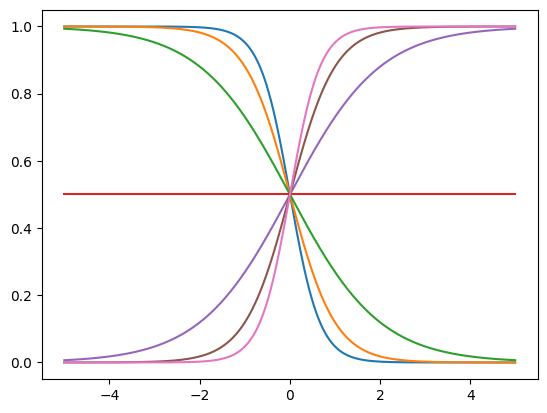

In [6]:
fig,ax = plt.subplots()

x = np.arange(-5,5,0.01)
phi_0s = [0, 0, 0, 0, 0, 0, 0]
phi_1s = [-3, -2, -1, 0, 1, 2, 3]

for phi_0, phi_1 in zip(phi_0s, phi_1s):
    y = f(x, phi_0, phi_1)
    ax.plot(x,y,label=f'$\phi_0={phi_0}, \phi_1={phi_1}$')

Generate 10 data points each for class 0 and class 1. The data points for class 0 are generated from a normal distribution with mean -1 and standard deviation 1. The data points for class 1 are generated from a normal distribution with mean 1 and standard deviation 1.

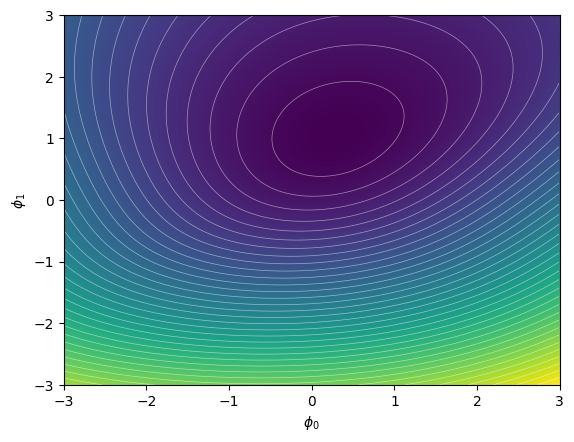

In [19]:
x0 = np.random.normal(-1, 1, 10)
y0 = np.repeat(0, 10)
x1 = np.random.normal(1, 1, 10)
y1 = np.repeat(1, 10)

def logistic_loss(x, y, phi_0, phi_1):
    return -np.sum(y*np.log(f(x, phi_0, phi_1)) + (1-y)*np.log(1-f(x, phi_0, phi_1)))

# Draw a heatmap of the loss function with contour lines
phi_0s = np.arange(-3, 3, 0.01)
phi_1s = np.arange(-3, 3, 0.01)
losses = np.zeros((len(phi_1s), len(phi_0s)))
for i, phi_1 in enumerate(phi_1s):
    for j, phi_0 in enumerate(phi_0s):
        losses[i,j] = logistic_loss(np.concatenate([x0, x1]), np.concatenate([y0, y1]), phi_0, phi_1)

fig,ax = plt.subplots()
ax.imshow(losses, extent=[-3, 3, -3, 3], aspect='auto', origin='lower')
ax.set_xlabel('$\phi_0$')
ax.set_ylabel('$\phi_1$')

# Draw the contour lines
CS = ax.contour(phi_0s, phi_1s, losses, levels=50, colors='white', alpha=0.5, linewidths=0.5)

plt.show()